## Data Preprocessig and Data cleaning 

In [ ]:
from google.colab import drive 
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

# Load data files

In [ ]:
data_dir='/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification'

In [ ]:
data = load_files(data_dir)

In [ ]:
folders=os.listdir("/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification")
print(folders)

['COVID', 'non-COVID']


In [ ]:
# Converting files to numpy array 

X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

In [ ]:
# How the arrays look like?
print('Data files - ',X[1100])
print('Target labels - ',y[1100])

Data files -  /content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification/non-COVID/Non-Covid (51).png
Target labels -  1


# Convert images to arrays

In [ ]:
def convert_img_to_arr(file_path_list):
  arr=[]
  img_height,img_width=224,224
  for file in file_path_list:
    img_load=load_img(file,target_size=(img_height,img_width))
    img=img_to_array(img_load)
    arr.append(img)
  return arr

In [ ]:
X=np.array(convert_img_to_arr(X))

In [ ]:
X.shape

(2481, 224, 224, 3)

In [ ]:
print('First image array',X[0])

First image array [[[232. 232. 232.]
  [232. 232. 232.]
  [232. 232. 232.]
  ...
  [233. 233. 233.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[232. 232. 232.]
  [232. 232. 232.]
  [232. 232. 232.]
  ...
  [233. 233. 233.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[232. 232. 232.]
  [232. 232. 232.]
  [232. 232. 232.]
  ...
  [232. 232. 232.]
  [232. 232. 232.]
  [232. 232. 232.]]

 ...

 [[228. 228. 228.]
  [228. 228. 228.]
  [228. 228. 228.]
  ...
  [231. 231. 231.]
  [231. 231. 231.]
  [231. 231. 231.]]

 [[230. 230. 230.]
  [230. 230. 230.]
  [231. 231. 231.]
  ...
  [231. 231. 231.]
  [232. 232. 232.]
  [232. 232. 232.]]

 [[230. 230. 230.]
  [230. 230. 230.]
  [231. 231. 231.]
  ...
  [231. 231. 231.]
  [232. 232. 232.]
  [232. 232. 232.]]]


# Let's have look at our pictures

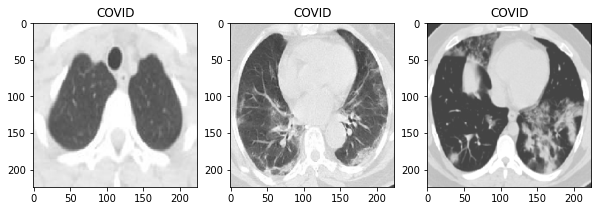

In [ ]:
fig=plt.figure(figsize=(10,5))
for i in range(3):
  ax=fig.add_subplot(1,3,i+1)
  ax.imshow((X[i].astype(np.uint8)))
  plt.title(folders[y[i]])


In [ ]:
"""
   After that data is converted into Numpy array, Now, 
   Let's scale the pixel intenties to the range[0,255]
"""
X = X.astype('float32')/255         

In [ ]:
print('First image array',X[0])

First image array [[[0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  ...
  [0.9137255  0.9137255  0.9137255 ]
  [0.9137255  0.9137255  0.9137255 ]
  [0.9137255  0.9137255  0.9137255 ]]

 [[0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  ...
  [0.9137255  0.9137255  0.9137255 ]
  [0.9137255  0.9137255  0.9137255 ]
  [0.9137255  0.9137255  0.9137255 ]]

 [[0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  ...
  [0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]
  [0.9098039  0.9098039  0.9098039 ]]

 ...

 [[0.89411765 0.89411765 0.89411765]
  [0.89411765 0.89411765 0.89411765]
  [0.89411765 0.89411765 0.89411765]
  ...
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]
  [0.90588236 0.90588236 0.90588236]]

 [[0.9019608  0.9019608  0.9019608 ]
  [0.9019608  0.901

In [ ]:
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

2

In [ ]:
""" 
let's converts a class vector (integers) to binary class matrix by performing the 
one-hot encoding on the labels
"""
y = np.array(np_utils.to_categorical(y,no_of_classes))

## Split the data into training, testing and validation dataset


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)                   ## split original dataset to create train & test dataset

In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)  ## split test dataset to craete validation & test dataset|

In [ ]:
print('shape of training dataset',X_train.shape)
print('shape of testing dataset',X_test.shape)
print('shape of validaion dataset',X_valid.shape)

shape of training dataset (1860, 224, 224, 3)
shape of testing dataset (310, 224, 224, 3)
shape of validaion dataset (311, 224, 224, 3)


## CNN implementation

In [ ]:
from keras.applications import ResNet50                                   ### Import resnet50 as our pre-trained model for CNN
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(no_of_classes, activation='softmax'))

model.layers[0].trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 1024)              2

## Compile the model

In [ ]:
lr = 0.001
epochs = 50
bs = 16
optimizer = Adam(lr = lr, decay= lr/epochs)
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Modelling

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=15,
        fill_mode ="nearest")
 
checkpointer = ModelCheckpoint(filepath = "/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification/model.h5", save_best_only = True, verbose=1)
start = time.time()
 
# let's get started !
 
history=model.fit(train_datagen.flow(X_train, y_train, batch_size = bs),
                            steps_per_epoch = len(X_train)//bs,
                            validation_data = (X_valid, y_valid),
                            validation_steps = len(X_valid)//bs,
                            epochs =epochs,
                            callbacks= [checkpointer])
end = time.time()
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

<ipython-input-24-caa26266ddf5>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_datagen.flow(X_train, y_train, batch_size = bs),


Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 0.7441 - accuracy: 0.7332
Epoch 1: val_loss improved from inf to 0.87476, saving model to /content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification/model.h5
116/116 [==============================] - 392s 3s/step - loss: 0.7441 - accuracy: 0.7332 - val_loss: 0.8748 - val_accuracy: 0.4855
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.7934
Epoch 2: val_loss improved from 0.87476 to 0.85794, saving model to /content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification/model.h5
116/116 [==============================] - 378s 3s/step - loss: 0.4481 - accuracy: 0.7934 - val_loss: 0.8579 - val_accuracy: 0.5370
Epoch 3/50
116/116 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8080
Epoch 3: val_loss improved from 0.85794 to 0.61898, saving model to /content/drive/MyDrive/My projects/Covid

KeyboardInterrupt: ignored

## Testing the model

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=bs, verbose=2)

20/20 - 63s - loss: 0.2975 - accuracy: 0.8871 - 63s/epoch - 3s/step


In [ ]:
print("Accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("Loss: {:.2f}%".format(eval_loss*100))

Accuracy: 88.71%
Loss: 29.75%


## Prediction

10/10 [==============================] - 54s 5s/step


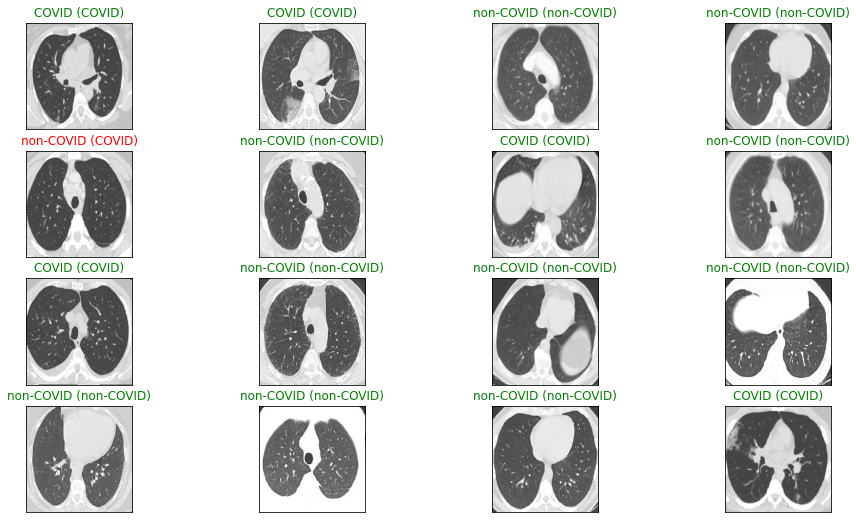

In [ ]:
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

# Plot Confusion matrix

10/10 [==============================] - 55s 5s/step


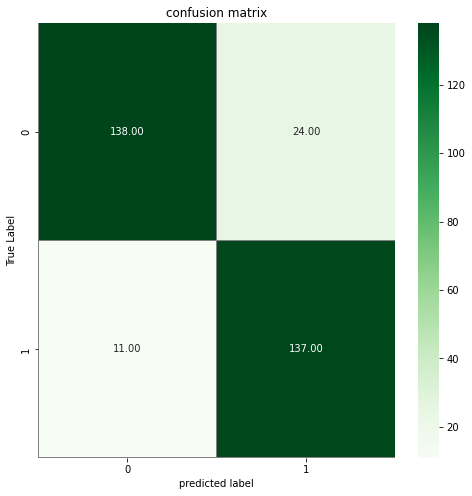

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

### Classification report

In [ ]:
print(classification_report(y_test.argmax(axis=1),Y_pred_classes,  target_names= labels))

              precision    recall  f1-score   support

       COVID       0.93      0.85      0.89       162
   non-COVID       0.85      0.93      0.89       148

    accuracy                           0.89       310
   macro avg       0.89      0.89      0.89       310
weighted avg       0.89      0.89      0.89       310



## Loading our h5 model

In [ ]:
import keras

In [ ]:
covid_non_covid=keras.models.load_model('/content/drive/MyDrive/My projects/Covid_or_notCovid_image_classification/Image_classification/model.h5')

10/10 [==============================] - 50s 5s/step


ValueError: ignored

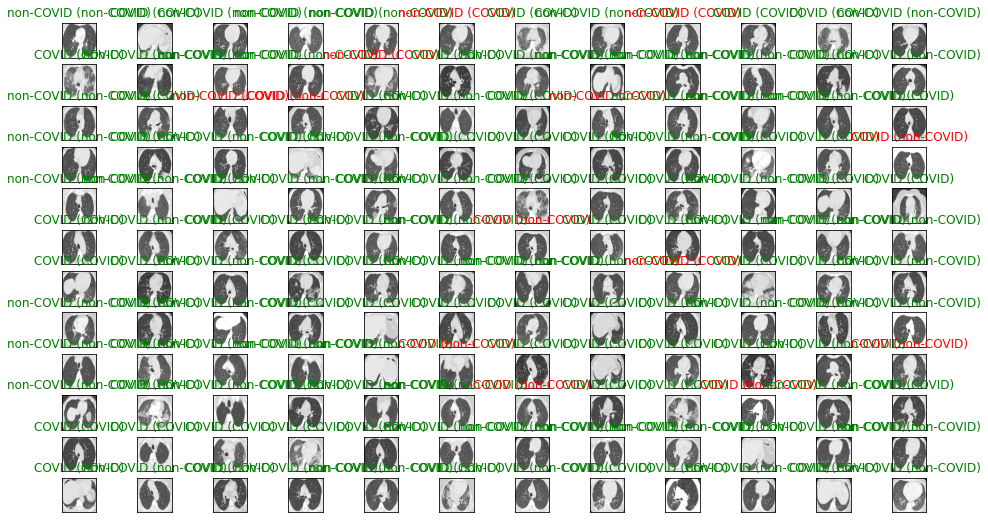

In [ ]:
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=150, replace=False)):
        ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(covid_non_covid.predict(X_test))